In [77]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from scipy.stats import f_oneway, chi2_contingency, ttest_ind



In [78]:
sns.set(style="whitegrid")

## –ü—Ä–µ–¥–≤–∞—Ä–∏—Ç–∞–ª—å–Ω–∞—è —Ä–∞–±–æ—Ç–∞ —Å –¥–∞–Ω–Ω—ã–º–∏

In [79]:
data = pd.read_csv('shopping_trends.csv')

In [80]:
df = data.copy()
df.head()

Customer ID  Age Gender Item Purchased  Category  Purchase Amount (USD)  \
0            1   55   Male         Blouse  Clothing                     53   
1            2   19   Male        Sweater  Clothing                     64   
2            3   50   Male          Jeans  Clothing                     73   
3            4   21   Male        Sandals  Footwear                     90   
4            5   45   Male         Blouse  Clothing                     49   

        Location Size      Color  Season  Review Rating Subscription Status  \
0       Kentucky    L       Gray  Winter            3.1                 Yes   
1          Maine    L     Maroon  Winter            3.1                 Yes   
2  Massachusetts    S     Maroon  Spring            3.1                 Yes   
3   Rhode Island    M     Maroon  Spring            3.5                 Yes   
4         Oregon    M  Turquoise  Spring            2.7                 Yes   

  Payment Method  Shipping Type Discount Applied Promo Code Used  \
0    Credit Card        Express              Yes             Yes   
1  Bank Transfer        Express              Yes             Yes   
2           Cash  Free Shipping              Yes             Yes   
3         PayPal   Next Day Air              Yes             Yes   
4           Cash  Free Shipping              Yes             Yes   

   Previous Purchases Preferred Payment Method Frequency of Purchases  
0                  14                    Venmo            Fortnightly  
1                   2                     Cash            Fortnightly  
2                  23              Credit Card                 Weekly  
3                  49                   PayPal                 Weekly  
4                  31                   PayPal               Annually

In [81]:
df.shape

(3900, 19)

In [82]:
df = df.drop_duplicates()
df.shape

(3900, 19)

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               3900 non-null   int64  
 1   Age                       3900 non-null   int64  
 2   Gender                    3900 non-null   object 
 3   Item Purchased            3900 non-null   object 
 4   Category                  3900 non-null   object 
 5   Purchase Amount (USD)     3900 non-null   int64  
 6   Location                  3900 non-null   object 
 7   Size                      3900 non-null   object 
 8   Color                     3900 non-null   object 
 9   Season                    3900 non-null   object 
 10  Review Rating             3900 non-null   float64
 11  Subscription Status       3900 non-null   object 
 12  Payment Method            3900 non-null   object 
 13  Shipping Type             3900 non-null   object 
 14  Discount

In [84]:
df.isnull().sum()

Customer ID                 0
Age                         0
Gender                      0
Item Purchased              0
Category                    0
Purchase Amount (USD)       0
Location                    0
Size                        0
Color                       0
Season                      0
Review Rating               0
Subscription Status         0
Payment Method              0
Shipping Type               0
Discount Applied            0
Promo Code Used             0
Previous Purchases          0
Preferred Payment Method    0
Frequency of Purchases      0
dtype: int64

In [85]:
df.describe()

Customer ID          Age  Purchase Amount (USD)  Review Rating  \
count  3900.000000  3900.000000            3900.000000    3900.000000   
mean   1950.500000    44.068462              59.764359       3.749949   
std    1125.977353    15.207589              23.685392       0.716223   
min       1.000000    18.000000              20.000000       2.500000   
25%     975.750000    31.000000              39.000000       3.100000   
50%    1950.500000    44.000000              60.000000       3.700000   
75%    2925.250000    57.000000              81.000000       4.400000   
max    3900.000000    70.000000             100.000000       5.000000   

       Previous Purchases  
count         3900.000000  
mean            25.351538  
std             14.447125  
min              1.000000  
25%             13.000000  
50%             25.000000  
75%             38.000000  
max             50.000000

In [86]:
df.describe(include=['object'])

Gender Item Purchased  Category Location  Size  Color  Season  \
count    3900           3900      3900     3900  3900   3900    3900   
unique      2             25         4       50     4     25       4   
top      Male         Blouse  Clothing  Montana     M  Olive  Spring   
freq     2652            171      1737       96  1755    177     999   

       Subscription Status Payment Method  Shipping Type Discount Applied  \
count                 3900           3900           3900             3900   
unique                   2              6              6                2   
top                     No    Credit Card  Free Shipping               No   
freq                  2847            696            675             2223   

       Promo Code Used Preferred Payment Method Frequency of Purchases  
count             3900                     3900                   3900  
unique               2                        6                      7  
top                 No                   PayPal         Every 3 Months  
freq              2223                      677                    584

In [87]:
set(df['Category'])

{'Accessories', 'Clothing', 'Footwear', 'Outerwear'}

In [88]:
set(df['Payment Method'])

{'Bank Transfer', 'Cash', 'Credit Card', 'Debit Card', 'PayPal', 'Venmo'}

In [89]:
set(df['Shipping Type'])

{'2-Day Shipping',
 'Express',
 'Free Shipping',
 'Next Day Air',
 'Standard',
 'Store Pickup'}

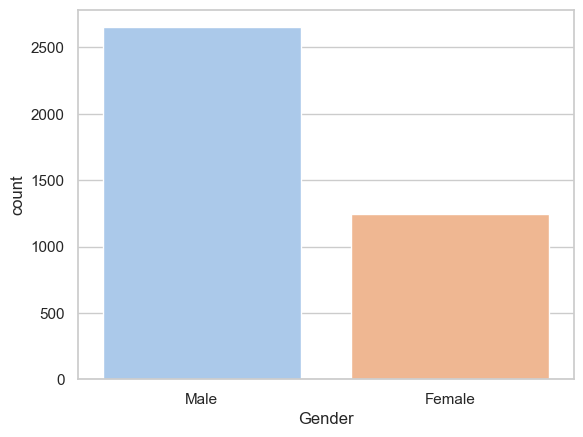

In [90]:
sns.countplot(data=df, x='Gender', hue='Gender', palette='pastel');

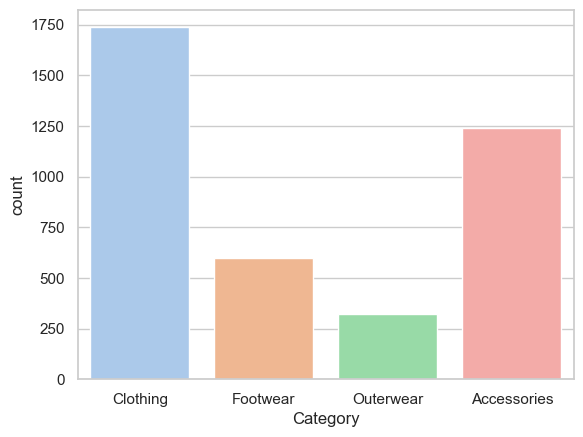

In [91]:
sns.countplot(data=df, x='Category', hue='Category', palette='pastel');

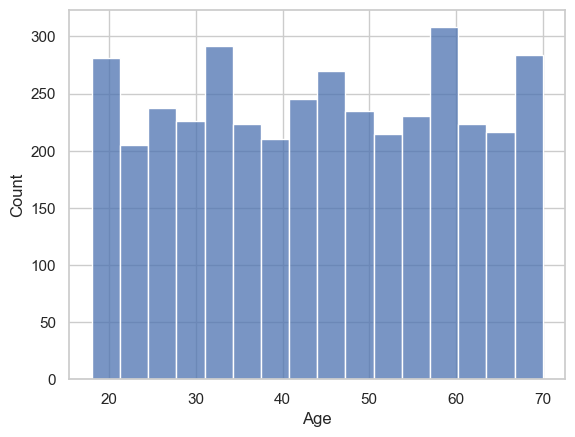

In [92]:
sns.histplot(data=df, x='Age');

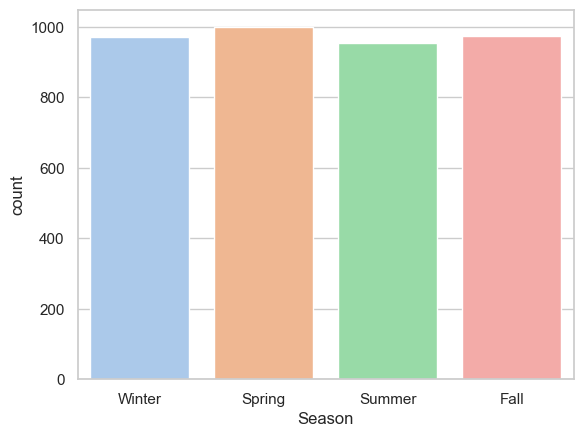

In [93]:
sns.countplot(data=df, x='Season', hue='Season', palette='pastel');

In [94]:
df["Item Purchased"].value_counts()

Item Purchased
Blouse        171
Jewelry       171
Pants         171
Shirt         169
Dress         166
Sweater       164
Jacket        163
Belt          161
Sunglasses    161
Coat          161
Sandals       160
Socks         159
Skirt         158
Shorts        157
Scarf         157
Hat           154
Handbag       153
Hoodie        151
Shoes         150
T-shirt       147
Sneakers      145
Boots         144
Backpack      143
Gloves        140
Jeans         124
Name: count, dtype: int64

## <h2>–ó–∞–¥–∞–Ω–∏–µ 1.1</h2>


–ù–∞ –æ—Å–Ω–æ–≤–∞–Ω–∏–∏ —ç—Ç–∏—Ö –¥–∞–Ω–Ω—ã—Ö –Ω–µ–æ–±—Ö–æ–¥–∏–º–æ —Å–æ—Å—Ç–∞–≤–∏—Ç—å –º–∞–∫—Å–∏–º–∞–ª—å–Ω–æ–µ(–Ω–æ –Ω–µ –º–µ–Ω–µ–µ –ø—è—Ç–∏) –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –≥–∏–ø–æ—Ç–µ–∑ –æ –∫–æ—Ä—Ä–µ–ª—è—Ü–∏—è—Ö –º–µ–∂–¥—É –æ—Ç–¥–µ–ª—å–Ω—ã–º–∏ —Å—Ç–æ–ª–±—Ü–∞–º–∏ –∏ –ø—Ä–æ–≤–µ—Ä–∏—Ç—å –∏—Ö. 

–ü—Ä–∏ —ç—Ç–æ–º –ø—Ä–∏ —Å–æ—Å—Ç–∞–≤–ª–µ–Ω–∏–∏ –≥–∏–ø–æ—Ç–µ–∑ –º–æ–∂–Ω–æ —Ä–∞—Å—Å–º–∞—Ç—Ä–∏–≤–∞—Ç—å –Ω–µ –ø–æ–ª–Ω—ã–π df, –∞ –∏–º–µ–Ω–Ω–æ –≤—ã–±–æ—Ä–∫–∏ (–Ω–∞–ø—Ä–∏–º–µ—Ä: "–∂–µ–Ω—â–∏–Ω—ã —Å—Ç–∞—Ä—à–µ 40 –ª–µ—Ç –ø–æ–∫—É–ø–∞—é—Ç –≤ –æ—Å–Ω–æ–≤–Ω–æ–º –æ—Å–µ–Ω—å—é")

–ü—Ä–æ–≤–µ—Ä–∏–º —Å–ª–µ–¥—É—é—â–∏–µ –≥–∏–ø–æ—Ç–µ–∑—ã:
- –ö–ª–∏–µ–Ω—Ç—ã —Å—Ä–µ–¥–Ω–µ–≥–æ –≤–æ–∑—Ä–∞—Å—Ç–∞ (–ø—Ä–∏–º–µ—Ä–Ω–æ 30-40 –ª–µ—Ç) —Å–æ–≤–µ—Ä—à–∞—é—Ç –±–æ–ª–µ–µ –∫—Ä—É–ø–Ω—ã–µ –ø–æ–∫—É–ø–∫–∏ –ø–æ —Å—Ä–∞–≤–Ω–µ–Ω–∏—é —Å –æ—Å—Ç–∞–ª—å–Ω—ã–º–∏ –≤–æ–∑—Ä–∞—Å—Ç–Ω—ã–º–∏ –≥—Ä—É–ø–ø–∞–º–∏;
- –ñ–µ–Ω—â–∏–Ω—ã –¥–µ–ª–∞—é—Ç –±–æ–ª–µ–µ –∫—Ä—É–ø–Ω—ã–µ –ø–æ–∫—É–ø–∫–∏;
- –ü–æ–∫—É–ø–∞—Ç–µ–ª–∏ —á–∞—â–µ –ø—Ä–∏–æ–±—Ä–µ—Ç–∞—é—Ç —Å–µ–∑–æ–Ω–Ω—ã–µ —Ç–æ–≤–∞—Ä—ã –≤ —Ç–µ—á–µ–Ω–∏–µ —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤—É—é—â–µ–≥–æ —Å–µ–∑–æ–Ω–∞;
- –ö–ª–∏–µ–Ω—Ç—ã —Å –ø–æ–¥–ø–∏—Å–∫–æ–π –ø–æ–ª—É—á–∞—é—Ç —Å–∫–∏–¥–∫—É;
- –ö–ª–∏–µ–Ω—Ç—ã —Å –ø—Ä–æ–º–æ–∫–æ–¥–æ–º —Ç—Ä–∞—Ç—è—Ç –±–æ–ª—å—à–µ, —á–µ–º –ø–æ–∫—É–ø–∞—Ç–µ–ª–∏ –±–µ–∑ –Ω–µ–≥–æ;
- –ú—É–∂—á–∏–Ω—ã —á–∞—â–µ –ø—Ä–∏–æ–±—Ä–µ—Ç–∞—é—Ç –ø–æ–¥–ø–∏—Å–∫—É. 

##### 1. –ö–ª–∏–µ–Ω—Ç—ã —Å—Ä–µ–¥–Ω–µ–≥–æ –≤–æ–∑—Ä–∞—Å—Ç–∞ (–ø—Ä–∏–º–µ—Ä–Ω–æ 30-40 –ª–µ—Ç) —Å–æ–≤–µ—Ä—à–∞—é—Ç –±–æ–ª–µ–µ –∫—Ä—É–ø–Ω—ã–µ –ø–æ–∫—É–ø–∫–∏ –ø–æ —Å—Ä–∞–≤–Ω–µ–Ω–∏—é —Å –æ—Å—Ç–∞–ª—å–Ω—ã–º–∏ –≤–æ–∑—Ä–∞—Å—Ç–Ω—ã–º–∏ –≥—Ä—É–ø–ø–∞–º–∏

–î–ª—è –Ω–∞—á–∞–ª–∞ —Ä–∞–∑–¥–µ–ª–∏–º –∫–ª–∏–µ–Ω—Ç–æ–≤ –ø–æ –≤–æ–∑—Ä–∞—Å—Ç–Ω—ã–º –≥—Ä—É–ø–ø–∞–º –Ω–∞ –æ—Å–Ω–æ–≤–µ –∫–≤–∞–Ω—Ç–∏–ª–µ–π.
–ü–æ—Å–ª–µ —á–µ–≥–æ –ø—Ä–æ–∞–Ω–∞–ª–∏–∑–∏—Ä—É–µ–º —Å—Ä–µ–¥–Ω—é—é —Å—É–º–º—É –ø–æ–∫—É–ø–æ–∫ –¥–ª—è –∫–∞–∂–¥–æ–π –≤–æ–∑—Ä–∞—Å—Ç–Ω–æ–π –≥—Ä—É–ø–ø—ã.

In [95]:
quantiles = (
    pd.DataFrame(df['Age'].quantile([0,0.25,0.5,0.75,1]).reset_index())
    .rename(columns={'index':'percentile'})
)
quantiles

percentile   Age
0        0.00  18.0
1        0.25  31.0
2        0.50  44.0
3        0.75  57.0
4        1.00  70.0

In [96]:
perc = df['Age'].quantile([0,0.25,0.5,0.75,1])

df['Age_segment']= pd.cut(
    df['Age'],
    bins=[0, perc[0.25],perc[0.5], perc[0.75], perc[1]],
    labels=['0-31', '32-44', '45-57', '57+'],
    include_lowest=True
)

C:\Users\tanme\AppData\Local\Temp\ipykernel_17480\3479151971.py:1: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




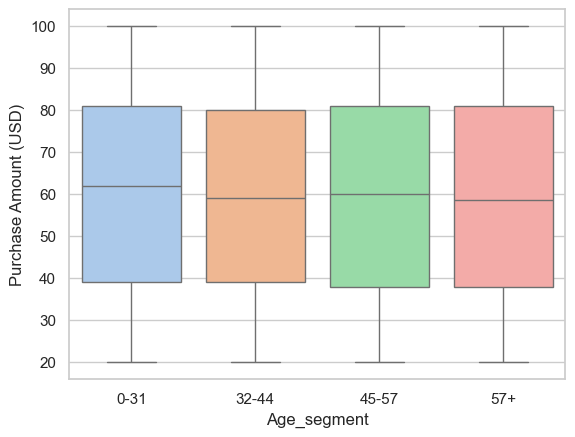

In [97]:
sns.boxplot(data=df, x='Age_segment', y='Purchase Amount (USD)', palette='pastel');

–ß—Ç–æ–±—ã –æ–ø—Ä–µ–¥–µ–ª–∏—Ç—å, –¥–µ–π—Å—Ç–≤–∏—Ç–µ–ª—å–Ω–æ –ª–∏ —Ä–∞–∑–Ω–∏—Ü–∞ –≤ —Å—Ä–µ–¥–Ω–µ–π —Å—É–º–º–µ –ø–æ–∫—É–ø–æ–∫ –º–µ–∂–¥—É –≥—Ä—É–ø–ø–∞–º–∏ –Ω–µ–∑–Ω–∞—á–∏—Ç–µ–ª—å–Ω–∞, –º–æ–∂–Ω–æ —Ç–∞–∫–∂–µ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å ANOVA.

- –ù—É–ª–µ–≤–∞—è –≥–∏–ø–æ—Ç–µ–∑–∞ (H‚ÇÄ): –°—Ä–µ–¥–Ω–∏–µ –∑–Ω–∞—á–µ–Ω–∏—è –≤—Å–µ—Ö –≥—Ä—É–ø–ø –æ–¥–∏–Ω–∞–∫–æ–≤—ã (–Ω–µ—Ç —Ä–∞–∑–ª–∏—á–∏–π).
- –ê–ª—å—Ç–µ—Ä–Ω–∞—Ç–∏–≤–Ω–∞—è –≥–∏–ø–æ—Ç–µ–∑–∞ (H‚ÇÅ): –ü–æ –∫—Ä–∞–π–Ω–µ–π –º–µ—Ä–µ –æ–¥–Ω–∞ –∏–∑ –≥—Ä—É–ø–ø –∏–º–µ–µ—Ç —Å—Ä–µ–¥–Ω–µ–µ –∑–Ω–∞—á–µ–Ω–∏–µ, –æ—Ç–ª–∏—á–Ω–æ–µ –æ—Ç –¥—Ä—É–≥–∏—Ö.

In [98]:

group_0_31 = df[df['Age_segment'] == '0-31']['Purchase Amount (USD)']
group_32_44 = df[df['Age_segment'] == '32-44']['Purchase Amount (USD)']
group_45_57 = df[df['Age_segment'] == '45-57']['Purchase Amount (USD)']
group_57_plus = df[df['Age_segment'] == '57+']['Purchase Amount (USD)']

f_stat, p_value = f_oneway(group_0_31, group_32_44, group_45_57, group_57_plus)
print(f"ANOVA F-statistic = {f_stat:.3f}, p-value = {p_value:.3f}")

ANOVA F-statistic = 0.665, p-value = 0.573


`F-statistic = 0.665` –ø–æ–∫–∞–∑—ã–≤–∞–µ—Ç, —á—Ç–æ —Ä–∞–∑–ª–∏—á–∏—è –º–µ–∂–¥—É —Å—Ä–µ–¥–Ω–∏–º–∏ –∑–Ω–∞—á–µ–Ω–∏—è–º–∏ –≤–æ–∑—Ä–∞—Å—Ç–Ω—ã—Ö –≥—Ä—É–ø–ø –æ—Ç–Ω–æ—Å–∏—Ç–µ–ª—å–Ω–æ –Ω–µ–≤–µ–ª–∏–∫–∏ –ø–æ —Å—Ä–∞–≤–Ω–µ–Ω–∏—é —Å –≤–Ω—É—Ç—Ä–∏–≥—Ä—É–ø–ø–æ–≤–æ–π –≤–∞—Ä–∏–∞—Ç–∏–≤–Ω–æ—Å—Ç—å—é. –¢–æ –µ—Å—Ç—å –≤–∞—Ä–∏–∞—Ç–∏–≤–Ω–æ—Å—Ç—å –≤–Ω—É—Ç—Ä–∏ –∫–∞–∂–¥–æ–π –≤–æ–∑—Ä–∞—Å—Ç–Ω–æ–π –≥—Ä—É–ø–ø—ã –±–æ–ª—å—à–µ, —á–µ–º –º–µ–∂–¥—É –≥—Ä—É–ø–ø–∞–º–∏.

`P-value > 0.05`, –Ω–µ—Ç —Å—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫–∏ –∑–Ω–∞—á–∏–º—ã—Ö —Ä–∞–∑–ª–∏—á–∏–π –º–µ–∂–¥—É –≤–æ–∑—Ä–∞—Å—Ç–Ω—ã–º–∏ –≥—Ä—É–ø–ø–∞–º–∏. –ú—ã –Ω–µ –æ—Ç–≤–µ—Ä–≥–∞–µ–º –Ω—É–ª–µ–≤—É—é –≥–∏–ø–æ—Ç–µ–∑—É (H‚ÇÄ) : —Å—Ä–µ–¥–Ω–∏–µ –∑–Ω–∞—á–µ–Ω–∏—è –≤–æ –≤—Å–µ—Ö –≤–æ–∑—Ä–∞—Å—Ç–Ω—ã—Ö –≥—Ä—É–ø–ø–∞—Ö —Ä–∞–≤–Ω—ã.

–¢–∞–∫–∏–º –æ–±—Ä–∞–∑–æ–º, –∫–ª–∏–µ–Ω—Ç—ã –≤—Å–µ—Ö –≤–æ–∑—Ä–∞—Å—Ç–Ω—ã—Ö –≥—Ä—É–ø–ø –¥–µ–ª–∞—é—Ç –ø—Ä–∏–º–µ—Ä–Ω–æ –æ–¥–∏–Ω–∞–∫–æ–≤—ã–µ –ø–æ–∫—É–ø–∫–∏.

##### 2. –ñ–µ–Ω—â–∏–Ω—ã –¥–µ–ª–∞—é—Ç –±–æ–ª–µ–µ –∫—Ä—É–ø–Ω—ã–µ –ø–æ–∫—É–ø–∫–∏

C:\Users\tanme\AppData\Local\Temp\ipykernel_17480\3803097098.py:1: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




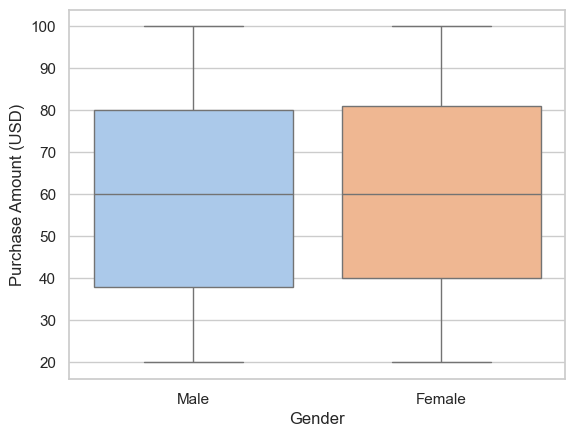

In [99]:
sns.boxplot(data=df, x='Gender', y='Purchase Amount (USD)', palette='pastel');

–°—Ä–∞–≤–Ω–∏–º —Å—Ä–µ–¥–Ω—é—é —Å—É–º–º—É –ø–æ–∫—É–ø–∫–∏ –º–µ–∂–¥—É –ø–æ–ª–∞–º–∏ —Å –ø–æ–º–æ—â—å—é t-—Ç–µ—Å—Ç–∞.

In [100]:
avg_women = df[df['Gender'] == 'Female']['Purchase Amount (USD)'].mean()
avg_men = df[df['Gender'] == 'Male']['Purchase Amount (USD)'].mean()
print(f"Women: ${avg_women:.2f}\nMen: ${avg_men:.2f} ")
t_stat, p_value = ttest_ind(df[df['Gender'] == 'Female']['Purchase Amount (USD)'], 
                            df[df['Gender'] == 'Male']['Purchase Amount (USD)'])

print(f"T-statistic = {t_stat:.3f}, p-value = {p_value:.3f}")

Women: $60.25
Men: $59.54 
T-statistic = 0.877, p-value = 0.381


`P-value > 0.05`, –Ω–µ—Ç —Å—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫–∏ –∑–Ω–∞—á–∏–º—ã—Ö —Ä–∞–∑–ª–∏—á–∏–π –º–µ–∂–¥—É –ø–æ–ª–∞–º–∏. –í—Å–µ –¥–µ–ª–∞—é—Ç –ø—Ä–∏–º–µ—Ä–Ω–æ –æ–¥–∏–Ω–∞–∫–æ–≤—ã–µ –ø–æ–∫—É–ø–∫–∏.

##### 3. –ü–æ–∫—É–ø–∞—Ç–µ–ª–∏ —á–∞—â–µ –ø—Ä–∏–æ–±—Ä–µ—Ç–∞—é—Ç —Å–µ–∑–æ–Ω–Ω—ã–µ —Ç–æ–≤–∞—Ä—ã –≤ —Ç–µ—á–µ–Ω–∏–µ —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤—É—é—â–µ–≥–æ —Å–µ–∑–æ–Ω–∞.

–ü—Ä–æ–≤–µ—Ä–∏–º –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç—å –º–µ–∂–¥—É —Å–µ–∑–æ–Ω–æ–º –∏ –ø–æ–ø—É–ª—è—Ä–Ω–æ—Å—Ç—å—é —Ç–æ–≤–∞—Ä–æ–≤ —á–µ—Ä–µ–∑ —Ö–∏-–∫–≤–∞–¥—Ä–∞—Ç —Ç–µ—Å—Ç.

In [101]:
season_item_table = pd.crosstab(df['Season'], df['Category'])

chi2, p, dof, expected = chi2_contingency(season_item_table)

print(f"Chi-square statistic = {chi2:.3f}, P-value = {p:.3f}")

Chi-square statistic = 7.934, P-value = 0.541


`P-value > 0.05`, –Ω–µ—Ç —Å—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫–∏ –∑–Ω–∞—á–∏–º—ã—Ö —Ä–∞–∑–ª–∏—á–∏–π –≤ –ø–æ–∫—É–ø–∫–∞—Ö –º–µ–∂–¥—É —Å–µ–∑–æ–Ω–∞–º–∏.

##### 4. –ö–ª–∏–µ–Ω—Ç—ã —Å –ø–æ–¥–ø–∏—Å–∫–æ–π –ø–æ–ª—É—á–∞—é—Ç —Å–∫–∏–¥–∫—É

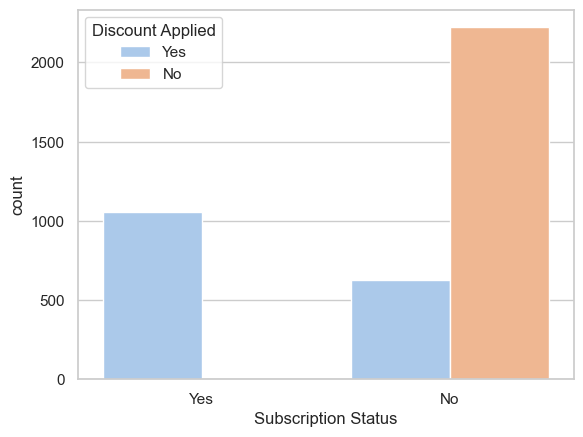

In [102]:
sns.countplot(data=df, x='Subscription Status', hue='Discount Applied', palette='pastel');

–î–µ–π—Å—Ç–≤–∏—Ç–µ–ª—å–Ω–æ, —É –≤—Å–µ—Ö –∫–ª–∏–µ–Ω—Ç–æ–≤ —Å –ø–æ–¥–ø–∏—Å–∫–æ–π –µ—Å—Ç—å —Å–∫–∏–¥–∫–∞.

##### 5. –ö–ª–∏–µ–Ω—Ç—ã —Å –ø—Ä–æ–º–æ–∫–æ–¥–æ–º —Ç—Ä–∞—Ç—è—Ç –±–æ–ª—å—à–µ, —á–µ–º –ø–æ–∫—É–ø–∞—Ç–µ–ª–∏ –±–µ–∑ –Ω–µ–≥–æ

C:\Users\tanme\AppData\Local\Temp\ipykernel_17480\3984076746.py:1: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




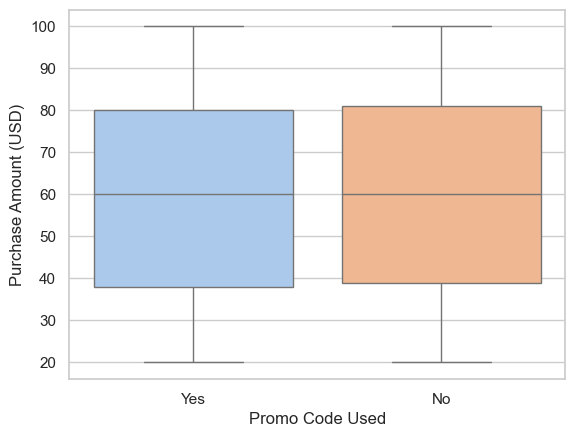

In [103]:
sns.boxplot(data=df, x='Promo Code Used', y='Purchase Amount (USD)', palette='pastel');

In [104]:
promo_users = df[df['Promo Code Used'] == 'Yes']
non_promo_users = df[df['Promo Code Used'] == 'No']

In [105]:
avg_promo = promo_users['Purchase Amount (USD)'].mean()
avg_non_promo = non_promo_users['Purchase Amount (USD)'].mean()
print(f'C—Ä–µ–¥–Ω—è—è —Å—É–º–º–∞ –ø–æ–∫—É–ø–∫–∏ :\n${avg_promo:.4}(Promo Code Used) –∏ ${avg_non_promo:.4}(Non-Promo Code Used)')


C—Ä–µ–¥–Ω—è—è —Å—É–º–º–∞ –ø–æ–∫—É–ø–∫–∏ :
$59.28(Promo Code Used) –∏ $60.13(Non-Promo Code Used)


In [106]:
t_stat, p_value = ttest_ind(promo_users['Purchase Amount (USD)'], non_promo_users['Purchase Amount (USD)'])
print(f"T-statistic = {t_stat:.3}, P-value = {p_value:.3}")

T-statistic = -1.11, P-value = 0.266


`P-value > 0.05`, –Ω–µ—Ç —Å—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫–∏ –∑–Ω–∞—á–∏–º—ã—Ö —Ä–∞–∑–ª–∏—á–∏–π –≤ —Å—É–º–º–µ –ø–æ–∫—É–ø–∫–∏ –ø—Ä–∏ –Ω–∞–ª–∏—á–∏–∏ –∏–ª–∏ –æ—Ç—Å—É—Ç—Å—Ç–≤–∏–µ –ø—Ä–æ–º–æ–∫–æ–¥–∞.

##### 6. –ú—É–∂—á–∏–Ω—ã —á–∞—â–µ –ø—Ä–∏–æ–±—Ä–µ—Ç–∞—é—Ç –ø–æ–¥–ø–∏—Å–∫—É

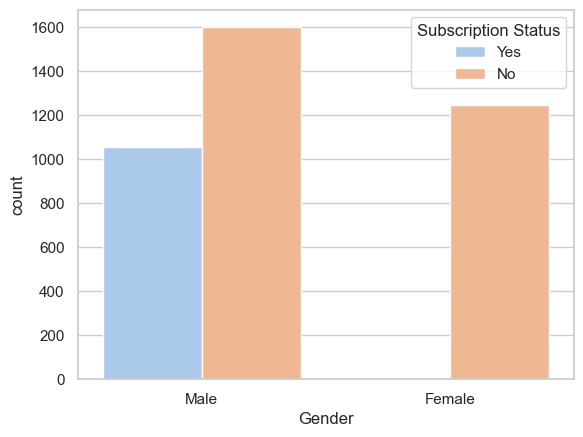

In [107]:
sns.countplot(data=df, x='Gender', hue='Subscription Status', palette='pastel');

–î–µ–π—Å—Ç–≤–∏—Ç–µ–ª—å–Ω–æ, –≤—Å–µ –ø–æ–¥–ø–∏—Å–∫–∏ –±—ã–ª–∏ –ø—Ä–∏–æ–±—Ä–µ—Ç–µ–Ω—ã –º—É–∂—á–∏–Ω–∞–º–∏. 

## <h2>–ó–∞–¥–∞–Ω–∏–µ 1.2</h2>

–ü–æ–º–∏–º–æ –≥–∏–ø–æ—Ç–µ–∑:
* –Ω–∞–π–¥–∏—Ç–µ —Å–∞–º—ã–π –ø–æ–ø—É–ª—è—Ä–Ω—ã–π —Ç–æ–≤–∞—Ä
* –ø–æ—Å—Ç—Ä–æ–π—Ç–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –ø–æ–∫—É–ø–∞—Ç–µ–ª–µ–π –ø–æ –ø–æ–ª—É
* –æ–ø—Ä–µ–¥–µ–ª–∏—Ç–µ, –∫–∞–∫–æ–π –ø–æ–ª (–∏ –æ—Ç–¥–µ–ª—å–Ω–æ –≤–æ–∑—Ä–∞—Å—Ç) –ø–æ–∫—É–ø–∞–µ—Ç –±–æ–ª—å—à–µ –≤—Å–µ–≥–æ, —á–∞—â–µ –≤—Å–µ–≥–æ, —Å–∞–º—ã–µ –¥–æ—Ä–æ–≥–∏–µ —Ç–æ–≤–∞—Ä—ã
* –æ–ø—Ä–µ–¥–µ–ª–∏—Ç–µ, –µ—Å—Ç—å –ª–∏ –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç—å –º–µ–∂–¥—É —Ü–≤–µ—Ç–æ–º –æ–¥–µ–∂–¥—ã –∏ —Å–µ–∑–æ–Ω–æ–º.
* –ø–æ—Å—á–∏—Ç–∞–π—Ç–µ –Ω–∞—à —Å–µ–∑–æ–Ω–Ω—ã–π mau (—É–Ω–∏–∫–∞–ª—å–Ω—ã—Ö –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π –∑–∞ —Å–µ–∑–æ–Ω) –∏ –µ–≥–æ –¥–∏–Ω–∞–º–∏–∫—É.
* –Ω–∞–π–¥–∏—Ç–µ —Å–∞–º—É—é –ø–æ–ø—É–ª—è—Ä–Ω—É—é –±—É–∫–≤—É –≤ –Ω–∞–∑–≤–∞–Ω–∏–∏ –æ–¥–µ–∂–¥—ã. 

##### **–°–∞–º—ã–π –ø–æ–ø—É–ª—è—Ä–Ω—ã–π —Ç–æ–≤–∞—Ä**


In [108]:
df['Item Purchased'].value_counts().head()

Item Purchased
Blouse     171
Jewelry    171
Pants      171
Shirt      169
Dress      166
Name: count, dtype: int64

–°–∞–º—ã–µ –ø–æ–ø—É–ª—è—Ä–Ω—ã–µ —Ç–æ–≤–∞—Ä—ã: **Blouse**, **Jewelry**, **Pants**.

##### **–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –ø–æ–∫—É–ø–∞—Ç–µ–ª–µ–π –ø–æ –ø–æ–ª—É**

In [109]:
fig = px.histogram(
    df, 
    x='Gender', 
    color='Gender'
)\
    .update_layout(
    width=600,  
    height=400)

fig.show()

##### **–ö–∞–∫–æ–π –ø–æ–ª –ø–æ–∫—É–ø–∞–µ—Ç –±–æ–ª—å—à–µ –≤—Å–µ–≥–æ, —á–∞—â–µ –≤—Å–µ–≥–æ, —Å–∞–º—ã–µ –¥–æ—Ä–æ–≥–∏–µ —Ç–æ–≤–∞—Ä—ã**

**–ö–∞–∫–æ–π –ø–æ–ª  –ø–æ–∫—É–ø–∞–µ—Ç –±–æ–ª—å—à–µ –≤—Å–µ–≥–æ?**

–°—Ä–∞–≤–Ω–∏–≤–∞–µ–º —Å—É–º–º–∞—Ä–Ω—ã–µ —Ä–∞—Å—Ö–æ–¥—ã –Ω–∞ –ø–æ–∫—É–ø–∫–∏ –º–µ–∂–¥—É –º—É–∂—á–∏–Ω–∞–º–∏ –∏ –∂–µ–Ω—â–∏–Ω–∞–º–∏. 

In [110]:
avg_women = df[df['Gender'] == 'Female']['Purchase Amount (USD)'].mean()
avg_men = df[df['Gender'] == 'Male']['Purchase Amount (USD)'].mean()
print(f"Women: ${avg_women:.2f}\nMen: ${avg_men:.2f} ")
t_stat, p_value = ttest_ind(df[df['Gender'] == 'Female']['Purchase Amount (USD)'], 
                            df[df['Gender'] == 'Male']['Purchase Amount (USD)'])

print(f"T-statistic = {t_stat:.3f}, p-value = {p_value:.3f}")

Women: $60.25
Men: $59.54 
T-statistic = 0.877, p-value = 0.381


`P-value > 0.05`, –Ω–µ—Ç —Å—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫–∏ –∑–Ω–∞—á–∏–º—ã—Ö —Ä–∞–∑–ª–∏—á–∏–π –º–µ–∂–¥—É –ø–æ–ª–∞–º–∏. –í—Å–µ –¥–µ–ª–∞—é—Ç –ø—Ä–∏–º–µ—Ä–Ω–æ –æ–¥–∏–Ω–∞–∫–æ–≤—ã–µ –ø–æ–∫—É–ø–∫–∏.

**–ö–∞–∫–æ–π –ø–æ–ª  –ø–æ–∫—É–ø–∞–µ—Ç —á–∞—â–µ –≤—Å–µ–≥–æ?**

–°—Ä–∞–≤–Ω–∏–≤–∞–µ–º —á–∞—Å—Ç–æ—Ç—É –ø–æ–∫—É–ø–æ–∫ –¥–ª—è –∫–∞–∂–¥–æ–≥–æ –ø–æ–ª–∞. 

–ü—Ä–µ–æ–±—Ä–∞–∑—É–µ–º —Å—Ç–æ–ª–±–µ—Ü `Frequency of Purchases` –∫ —á–∏—Å–ª–∞–º:

In [111]:
frequency_mapping = {
    'Weekly': 52,
    'Bi-Weekly': 26,
    'Fortnightly': 26,
    'Monthly': 12,
    'Quarterly': 4,
    'Every 3 Months': 4,
    'Annually': 1
}

df['Frequency (Numeric)'] = df['Frequency of Purchases'].map(frequency_mapping)

In [112]:
df.groupby('Gender')['Frequency (Numeric)'].mean()

Gender
Female    17.544071
Male      17.437029
Name: Frequency (Numeric), dtype: float64

In [113]:
male_frequency = df[df['Gender'] == 'Male']['Frequency (Numeric)']
female_frequency = df[df['Gender'] == 'Female']['Frequency (Numeric)']

# –ü—Ä–∏–º–µ–Ω—è–µ–º t-—Ç–µ—Å—Ç –¥–ª—è –ø—Ä–æ–≤–µ—Ä–∫–∏ –∑–Ω–∞—á–∏–º–æ—Å—Ç–∏ —Ä–∞–∑–ª–∏—á–∏–π –º–µ–∂–¥—É –º—É–∂—á–∏–Ω–∞–º–∏ –∏ –∂–µ–Ω—â–∏–Ω–∞–º–∏
t_stat, p_value = ttest_ind(male_frequency, female_frequency)

print(f"T-statistic: {t_stat:.3f}, p-value: {p_value:.3f}")

T-statistic: -0.185, p-value: 0.853


`P-value > 0.05`, –Ω–µ—Ç —Å—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫–∏ –∑–Ω–∞—á–∏–º—ã—Ö —Ä–∞–∑–ª–∏—á–∏–π –º–µ–∂–¥—É –ø–æ–ª–∞–º–∏. –ú—É–∂—á–∏–Ω—ã –∏ –∂–µ–Ω—â–∏–Ω—ã —Å–æ–≤–µ—Ä—à–∞—é—Ç –ø–æ–∫—É–ø–∫–∏ —Å –æ–¥–∏–Ω–∞–∫–æ–≤–æ–π —á–∞—Å—Ç–æ—Ç–æ–π.

**–ö–∞–∫–æ–π –ø–æ–ª  –ø–æ–∫—É–ø–∞–µ—Ç —Å–∞–º—ã–µ –¥–æ—Ä–æ–≥–∏–µ —Ç–æ–≤–∞—Ä—ã?**


–°–∞–º—ã–µ –¥–æ—Ä–æ–≥–∏–µ —Ç–æ–≤–∞—Ä—ã –æ–ø—Ä–µ–¥–µ–ª–∏–º –∏–∑ 90-–π –ø—Ä–æ—Ü–µ–Ω—Ç–∏–ª—è, —Ç–æ –µ—Å—Ç—å —Å–∞–º—ã–µ –¥–æ—Ä–æ–≥–∏–µ —Ç–æ–≤–∞—Ä—ã, –ø—Ä–µ–≤—ã—à–∞—é—Ç –Ω–µ–∫–æ—Ç–æ—Ä—É—é –ø–æ—Ä–æ–≥–æ–≤—É—é —Ü–µ–Ω—É ($93).

In [114]:
price_90_quantile = df['Purchase Amount (USD)'].quantile(0.9)
expensive_items = df[df['Purchase Amount (USD)'] >= price_90_quantile]
price_90_quantile

93.0

In [115]:
gender_expensive_counts = pd.crosstab(expensive_items['Gender'], expensive_items['Customer ID'])

chi2, p, dof, expected = chi2_contingency(gender_expensive_counts)

print(f"Chi-square statistic = {chi2:.3f}, P-value = {p:.3f}")

Chi-square statistic = 407.000, P-value = 0.477


`P-value > 0.05`, –Ω–µ—Ç —Å—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫–∏ –∑–Ω–∞—á–∏–º—ã—Ö —Ä–∞–∑–ª–∏—á–∏–π –ø—Ä–∏ –ø–æ–∫—É–ø–∫–∏ –¥–æ—Ä–æ–≥–∏—Ö —Ç–æ–≤–∞—Ä–æ–≤ –º–µ–∂–¥—É –ø–æ–ª–∞–º–∏. –ü—Ä–∏ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–∏ 90-–≥–æ –ø—Ä–æ—Ü–µ–Ω—Ç–∏–ª—è –¥–ª—è –æ–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è –¥–æ—Ä–æ–≥–∏—Ö —Ç–æ–≤–∞—Ä–æ–≤, –æ–∫–∞–∑–∞–ª–æ—Å—å, —á—Ç–æ –º—É–∂—á–∏–Ω—ã –∏ –∂–µ–Ω—â–∏–Ω—ã –ø–æ–∫—É–ø–∞—é—Ç —Ç–∞–∫–∏–µ —Ç–æ–≤–∞—Ä—ã —Å –ø—Ä–∏–º–µ—Ä–Ω–æ –æ–¥–∏–Ω–∞–∫–æ–≤–æ–π —á–∞—Å—Ç–æ—Ç–æ–π. 

##### **–ö–∞–∫–æ–π –≤–æ–∑—Ä–∞—Å—Ç –ø–æ–∫—É–ø–∞–µ—Ç –±–æ–ª—å—à–µ –≤—Å–µ–≥–æ, —á–∞—â–µ –≤—Å–µ–≥–æ, —Å–∞–º—ã–µ –¥–æ—Ä–æ–≥–∏–µ —Ç–æ–≤–∞—Ä—ã**

**–ö–∞–∫–æ–π –≤–æ–∑—Ä–∞—Å—Ç –ø–æ–∫—É–ø–∞–µ—Ç –±–æ–ª—å—à–µ –≤—Å–µ–≥–æ?**

In [116]:
group_0_31 = df[df['Age_segment'] == '0-31']['Purchase Amount (USD)']
group_32_44 = df[df['Age_segment'] == '32-44']['Purchase Amount (USD)']
group_45_57 = df[df['Age_segment'] == '45-57']['Purchase Amount (USD)']
group_57_plus = df[df['Age_segment'] == '57+']['Purchase Amount (USD)']

f_stat, p_value = f_oneway(group_0_31, group_32_44, group_45_57, group_57_plus)
print(f"ANOVA F-statistic = {f_stat:.3f}, p-value = {p_value:.3f}")

ANOVA F-statistic = 0.665, p-value = 0.573


`P-value > 0.05`, –Ω–µ—Ç —Å—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫–∏ –∑–Ω–∞—á–∏–º—ã—Ö —Ä–∞–∑–ª–∏—á–∏–π –º–µ–∂–¥—É –≤–æ–∑—Ä–∞—Å—Ç–Ω—ã–º–∏ –≥—Ä—É–ø–ø–∞–º–∏. –í—Å–µ —Å–æ–≤–µ—Ä—à–∞—é—Ç –ø–æ—Ö–æ–∂–∏–µ –ø–æ–∫—É–ø–∫–∏

**–ö–∞–∫–æ–π –≤–æ–∑—Ä–∞—Å—Ç –ø–æ–∫—É–ø–∞–µ—Ç —á–∞—â–µ –≤—Å–µ–≥–æ?**

In [117]:
df.groupby('Age_segment', observed=False)['Frequency (Numeric)'].mean()

Age_segment
0-31     17.293774
32-44    17.707006
45-57    17.877282
57+      17.005297
Name: Frequency (Numeric), dtype: float64

In [118]:
group_0_31_frequency = df[df['Age_segment'] == '0-31']['Frequency (Numeric)']
group_32_44_frequency = df[df['Age_segment'] == '32-44']['Frequency (Numeric)']
group_45_57_frequency = df[df['Age_segment'] == '45-57']['Frequency (Numeric)']
group_57_plus_frequency = df[df['Age_segment'] == '57+']['Frequency (Numeric)']

f_stat_frequency, p_value_frequency = f_oneway(
    group_0_31_frequency, group_32_44_frequency, group_45_57_frequency, group_57_plus_frequency
)

print(f"ANOVA –ø–æ —á–∞—Å—Ç–æ—Ç–µ –ø–æ–∫—É–ø–æ–∫: F-statistic = {f_stat_frequency:.3f}, p-value = {p_value_frequency:.3f}")


ANOVA –ø–æ —á–∞—Å—Ç–æ—Ç–µ –ø–æ–∫—É–ø–æ–∫: F-statistic = 0.533, p-value = 0.659


`P-value > 0.05`, –Ω–µ—Ç —Å—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫–∏ –∑–Ω–∞—á–∏–º—ã—Ö —Ä–∞–∑–ª–∏—á–∏–π –º–µ–∂–¥—É –≤–æ–∑—Ä–∞—Å—Ç–Ω—ã–º–∏ –≥—Ä—É–ø–ø–∞–º–∏. –í—Å–µ —Å–æ–≤–µ—Ä—à–∞—é—Ç –ø–æ–∫—É–ø–∫–∏ —Å –æ–¥–∏–Ω–∞–∫–æ–≤–æ–π —á–∞—Å—Ç–æ—Ç–æ–π.

**–ö–∞–∫–æ–π –≤–æ–∑—Ä–∞—Å—Ç –ø–æ–∫—É–ø–∞–µ—Ç —Å–∞–º—ã–µ –¥–æ—Ä–æ–≥–∏–µ —Ç–æ–≤–∞—Ä—ã?**

–í–æ—Å–ø–æ–ª—å–∑—É–µ–º—Å—è —Ä–µ—à–µ–Ω–∏–µ–º —Å 90-–π –ø—Ä–æ—Ü–µ–Ω—Ç–∏–ª–µ–º –¥–ª—è –æ–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è –¥–æ—Ä–æ–≥–∏—Ö —Ç–æ–≤–∞—Ä–æ–≤.

In [119]:
group_0_31_expensive = expensive_items[expensive_items['Age_segment'] == '0-31']['Purchase Amount (USD)']
group_32_44_expensive = expensive_items[expensive_items['Age_segment'] == '32-44']['Purchase Amount (USD)']
group_45_57_expensive = expensive_items[expensive_items['Age_segment'] == '45-57']['Purchase Amount (USD)']
group_57_plus_expensive = expensive_items[expensive_items['Age_segment'] == '57+']['Purchase Amount (USD)']

f_stat, p_value = f_oneway(group_0_31_expensive, group_32_44_expensive, group_45_57_expensive, group_57_plus_expensive)

print(f"ANOVA F-statistic: {f_stat:.3f}, p-value: {p_value:.3f}")

ANOVA F-statistic: 0.234, p-value: 0.873


`P-value > 0.05`, –Ω–µ—Ç —Å—Ç–∞—Ç–∏—Å—Ç–∏—á–µ—Å–∫–∏ –∑–Ω–∞—á–∏–º—ã—Ö —Ä–∞–∑–ª–∏—á–∏–π –º–µ–∂–¥—É –≤–æ–∑—Ä–∞—Å—Ç–Ω—ã–º–∏ –≥—Ä—É–ø–ø–∞–º–∏ –ø—Ä–∏ –ø–æ–∫—É–ø–∫–µ –¥–æ—Ä–æ–≥–∏—Ö —Ç–æ–≤–∞—Ä–æ–≤.

##### **–ó–∞–≤–∏—Å–∏–º–æ—Å—Ç—å –º–µ–∂–¥—É —Ü–≤–µ—Ç–æ–º –æ–¥–µ–∂–¥—ã –∏ —Å–µ–∑–æ–Ω–æ–º**

In [120]:
color_season_table = pd.crosstab(df['Color'], df['Season'])

chi2, p, dof, expected = chi2_contingency(color_season_table)
print(f"Chi-square statistic = {chi2:.3f}, P-value = {p:.3f}")

Chi-square statistic = 64.651, P-value = 0.719


–ü–æ–ª—É—á–∏–ª–∏ `p > 0.05`, –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏ –Ω–µ—Ç, –∏ –≤—ã–±–æ—Ä —Ü–≤–µ—Ç–∞ –æ–¥–µ–∂–¥—ã –Ω–µ —Å–≤—è–∑–∞–Ω —Å —Å–µ–∑–æ–Ω–æ–º.

##### **–°–µ–∑–æ–Ω–Ω—ã–π mau (—É–Ω–∏–∫–∞–ª—å–Ω—ã—Ö –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π –∑–∞ —Å–µ–∑–æ–Ω) –∏ –µ–≥–æ –¥–∏–Ω–∞–º–∏–∫—É**

In [121]:
seasonal_mau = df.groupby('Season')['Customer ID'].nunique()
seasonal_mau

Season
Fall      975
Spring    999
Summer    955
Winter    971
Name: Customer ID, dtype: int64

In [122]:
fig = px.bar(
    x=seasonal_mau.index, 
    y=seasonal_mau.values, 
    title='Seasonal Monthly Active Users (MAU)',
    text=seasonal_mau.values)\
    .update_layout(xaxis_title='Season', yaxis_title='Number of Unique Users', width=500, height=500)

fig.show()

##### **–°–∞–º—É—é –ø–æ–ø—É–ª—è—Ä–Ω–∞—è –±—É–∫–≤–∞ –≤ –Ω–∞–∑–≤–∞–Ω–∏–∏ –æ–¥–µ–∂–¥—ã**

–°–æ–µ–¥–∏–Ω–∏–º –≤—Å–µ –Ω–∞–∑–≤–∞–Ω–∏—è —Ç–æ–≤–∞—Ä–æ–≤ –≤ –æ–¥–Ω—É —Å—Ç—Ä–æ–∫—É –∏ –ø–æ—Å—á–∏—Ç–∞–µ–º —á–∞—Å—Ç–æ—Ç—É –∫–∞–∂–¥–æ–π –±—É–∫–≤—ã —Å –ø–æ–º–æ—â—å—é –±–∏–±–ª–∏–æ—Ç–µ–∫–∏ `collections`.

In [123]:
all_letters = ''.join(df['Item Purchased']).replace(' ', '')

In [124]:
from collections import Counter

letter_counts = Counter(all_letters)
most_popular_letter = max(letter_counts, key=letter_counts.get)
most_popular_letter

's'

`s` - c–∞–º–∞—è —á–∞—Å—Ç–∞—è –±—É–∫–≤–∞ –≤ –Ω–∞–∑–≤–∞–Ω–∏–∏ –æ–¥–µ–∂–¥—ã. 

**–ü–µ—Ä–≤–∏—á–Ω–∞—è —Ä–∞–±–æ—Ç–∞ —Å –¥–∞–Ω–Ω—ã–º–∏**

In [125]:
df = pd.read_csv('drinks.csv')
df.head(5)

country  beer_servings  spirit_servings  wine_servings  \
0  Afghanistan              0                0              0   
1      Albania             89              132             54   
2      Algeria             25                0             14   
3      Andorra            245              138            312   
4       Angola            217               57             45   

   total_litres_of_pure_alcohol  
0                           0.0  
1                           4.9  
2                           0.7  
3                          12.4  
4                           5.9

In [126]:
df.shape

(193, 5)

In [127]:
df = df.drop_duplicates()
df.shape

(193, 5)

In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       193 non-null    object 
 1   beer_servings                 193 non-null    int64  
 2   spirit_servings               193 non-null    int64  
 3   wine_servings                 193 non-null    int64  
 4   total_litres_of_pure_alcohol  193 non-null    float64
dtypes: float64(1), int64(3), object(1)
memory usage: 7.7+ KB


In [129]:
df.describe()

beer_servings  spirit_servings  wine_servings  \
count     193.000000       193.000000     193.000000   
mean      106.160622        80.994819      49.450777   
std       101.143103        88.284312      79.697598   
min         0.000000         0.000000       0.000000   
25%        20.000000         4.000000       1.000000   
50%        76.000000        56.000000       8.000000   
75%       188.000000       128.000000      59.000000   
max       376.000000       438.000000     370.000000   

       total_litres_of_pure_alcohol  
count                    193.000000  
mean                       4.717098  
std                        3.773298  
min                        0.000000  
25%                        1.300000  
50%                        4.200000  
75%                        7.200000  
max                       14.400000

**–¢–æ–ø —Å—Ç—Ä–∞–Ω –ø–æ –ø–æ—Ç—Ä–µ–±–ª–µ–Ω–∏—é –ª—é–±–æ–≥–æ –∞–ª–∫–æ–≥–æ–ª—è –≤ –ª–∏—Ç—Ä–∞—Ö**

In [130]:
df_tot = df.sort_values(by='total_litres_of_pure_alcohol', ascending=False)[['country','total_litres_of_pure_alcohol']].head(15)
df_tot

country  total_litres_of_pure_alcohol
15              Belarus                          14.4
98            Lithuania                          12.9
3               Andorra                          12.4
68              Grenada                          11.9
45       Czech Republic                          11.8
61               France                          11.8
141  Russian Federation                          11.5
81              Ireland                          11.4
155            Slovakia                          11.4
99           Luxembourg                          11.4
65              Germany                          11.3
75              Hungary                          11.3
136            Portugal                          11.0
135              Poland                          10.9
156            Slovenia                          10.6

**–¢–æ–ø —Å—Ç—Ä–∞–Ω –ø–æ –ø–æ—Ç—Ä–µ–±–ª–µ–Ω–∏—é –ø–∏–≤–∞**

In [131]:
df_beers = df.sort_values(by='beer_servings', ascending=False)[['country','beer_servings']].head(15)

df_beers

country  beer_servings
117         Namibia            376
45   Czech Republic            361
62            Gabon            347
65          Germany            346
98        Lithuania            343
135          Poland            343
188       Venezuela            333
81          Ireland            313
129           Palau            306
140         Romania            297
16          Belgium            295
130          Panama            285
160           Spain            284
151          Serbia            283
93           Latvia            281

**–¢–æ–ø —Å—Ç—Ä–∞–Ω –ø–æ –ø–æ—Ç—Ä–µ–±–ª–µ–Ω–∏—é –≤–∏–Ω–∞**

In [132]:
df_wine = df.sort_values(by='wine_servings', ascending=False)[['country','wine_servings']].head(15)
df_wine

country  wine_servings
61              France            370
136           Portugal            339
3              Andorra            312
166        Switzerland            280
48             Denmark            278
156           Slovenia            276
99          Luxembourg            271
42             Croatia            254
83               Italy            237
55   Equatorial Guinea            233
6            Argentina            221
185            Uruguay            220
67              Greece            218
8            Australia            212
16             Belgium            212

**–¢–æ–ø —Å—Ç—Ä–∞–Ω –ø–æ –ø–æ—Ç—Ä–µ–±–ª–µ–Ω–∏—é –¥—Ä—É–≥–∏—Ö —Å–ø–∏—Ä—Ç–Ω—ã—Ö –Ω–∞–ø–∏—Ç–∫–æ–≤**

In [133]:
df_spirits = df.sort_values(by='spirit_servings', ascending=False)[['country','spirit_servings']].head(15)
df_spirits

country  spirit_servings
68              Grenada              438
15              Belarus              373
73                Haiti              326
141  Russian Federation              326
144           St. Lucia              315
72               Guyana              302
155            Slovakia              293
50             Dominica              286
169            Thailand              258
40         Cook Islands              254
25             Bulgaria              252
87           Kazakhstan              246
98            Lithuania              244
180             Ukraine              237
139             Moldova              226

In [134]:
fig_beer = px.bar(df_beers.iloc[::-1], x='beer_servings', y='country', 
                  title='Countries by Beer Servings üç∫', 
                  labels={'beer_servings': 'Beer Servings', 'country': 'Country'},
                  orientation='h').update_traces(marker_color='gold')

fig_wine = px.bar(df_wine.iloc[::-1], x='wine_servings', y='country', 
                  title='Countries by Wine Servings üç∑', 
                  labels={'wine_servings': 'Wine Servings', 'country': 'Country'},
                  orientation='h').update_traces(marker_color='darkred ')

fig_spirits = px.bar(df_spirits.iloc[::-1], x='spirit_servings', y='country', 
                     title='Countries by Spirit Servings üç∏', 
                     labels={'spirit_servings': 'Spirit Servings', 'country': 'Country'},
                     orientation='h').update_traces(marker_color='skyblue')

fig_tot = px.bar(df_tot.iloc[::-1], x='total_litres_of_pure_alcohol', y='country', 
                  title='Countries by Total Litres of Pure Alcohol ü•Ç', 
                  labels={'total_litres_of_pure_alcohol': 'Total Litres of Pure Alcohol', 'country': 'Country'},
                  orientation='h').update_traces(marker_color='lightgreen')

fig_beer.show()
fig_wine.show()
fig_spirits.show()
fig_tot.show()


–õ–∏–¥–µ—Ä—ã –ø–æ –ø–æ—Ç—Ä–µ–±–ª–µ–Ω–∏–∏ –∞–ª–∫–æ–≥–æ–ª—è –≤ —Ä–∞–∑–Ω—ã—Ö —Å—Ç—Ä–∞–Ω–∞—Ö:

1. **–ü–∏–≤–æ**: –ù–∞–º–∏–±–∏—è, –ß–µ—Ö–∏—è, –ì–∞–±–æ–Ω, –ì–µ—Ä–º–∞–Ω–∏—è, –õ–∏—Ç–≤–∞, –ü–æ–ª—å—à–∞.
2. **–í–∏–Ω–æ**: –§—Ä–∞–Ω—Ü–∏—è, –ü–æ—Ä—Ç—É–≥–∞–ª–∏—è, –ê–Ω–¥–æ—Ä—Ä–∞, –®–≤–µ–π—Ü–∞—Ä–∏—è, –î–∞–Ω–∏—è.
3. **–î—Ä—É–≥–∏–µ —Å–ø–∏—Ä—Ç–Ω—ã–µ –Ω–∞–ø–∏—Ç–∫–∏**: –ì—Ä–µ–Ω–∞–¥–∞, –ë–µ–ª–∞—Ä—É—Å—å, –ì–∞–∏—Ç–∏, –†–æ—Å—Å–∏—è, –°–µ–Ω—Ç-–õ—é—Å–∏—è .
4. **–û–±—â–µ–µ –ø–æ—Ç—Ä–µ–±–ª–µ–Ω–∏–µ –∞–ª–∫–æ–≥–æ–ª—è**: –ë–µ–ª–∞—Ä—É—Å—å, –õ–∏—Ç–≤–∞, –ê–Ω–¥–æ—Ä—Ä–∞, –ì—Ä–µ–Ω–∞–¥–∞, –ß–µ—Ö–∏—è.

# <h1>–ó–∞–¥–∞–Ω–∏–µ 3</h1> 

–£ –Ω–∞—Å –µ—Å—Ç—å –ø–æ–ª–Ω—ã–π –∫–∞—Ç–∞–ª–æ–≥ –≤—Å–µ—Ö —Å–ª—É—á–∞–µ–≤, –∫–æ–≥–¥–∞ –∫—Ç–æ-—Ç–æ –ø—Ä–æ–∫–ª–∏–Ω–∞–ª –∏–ª–∏ –∏—Å—Ç–µ–∫–∞–ª –∫—Ä–æ–≤—å—é –≤ —Ñ–∏–ª—å–º–µ –ö–≤–µ–Ω—Ç–∏–Ω–∞ –¢–∞—Ä–∞–Ω—Ç–∏–Ω–æ. https://github.com/fivethirtyeight/data/tree/master/tarantino

–û–ø—Ä–µ–¥–µ–ª–∏—Ç–µ:

* —á–∏—Å–ª–æ –ø—Ä–æ–∫–ª—è—Ç–∏–π, –ª–µ—Ç–∞–ª—å–Ω—ã—Ö –∏—Å—Ö–æ–¥–æ–≤ –∏ –∏—Ö —Å–æ–æ—Ç–Ω–æ—à–µ–Ω–∏–µ –ø–æ —Ñ–∏–ª—å–º–∞–º 

* —á–∞—Å—Ç–æ—Ç—É —É–ø–æ—Ç—Ä–µ–±–ª–µ–Ω–∏—è –∫–æ–Ω–∫—Ä–µ—Ç–Ω—ã—Ö –ø—Ä–æ–∫–ª—è—Ç–∏–π 

* —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –≤—Ä–µ–º–µ–Ω–∏ –º–µ–∂–¥—É –ø—Ä–æ–∫–ª—è—Ç–∏—è–º–∏ 

**–ü–µ—Ä–≤–∏—á–Ω–∞—è —Ä–∞–±–æ—Ç–∞ —Å –¥–∞–Ω–Ω—ã–º–∏**

In [135]:
df = pd.read_csv('tarantino.csv')
df.sample(5)

movie  type          word  minutes_in
1710       Jackie Brown  word  motherfucker       70.12
957   Kill Bill: Vol. 1  word          shit       46.45
1645       Jackie Brown  word          fuck       31.97
217      Reservoir Dogs  word       fucking       46.66
95       Reservoir Dogs  word       fucking       20.96

In [136]:
df.shape

(1894, 4)

In [137]:
df = df.drop_duplicates()
df.shape

(1840, 4)

In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1840 entries, 0 to 1893
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   movie       1840 non-null   object 
 1   type        1840 non-null   object 
 2   word        1685 non-null   object 
 3   minutes_in  1840 non-null   float64
dtypes: float64(1), object(3)
memory usage: 71.9+ KB


In [139]:
df.describe(include='object')

movie  type     word
count           1840  1840     1685
unique             7     2       60
top     Pulp Fiction  word  fucking
freq             469  1685      404

In [140]:
df.movie.value_counts()

movie
Pulp Fiction           469
Reservoir Dogs         421
Jackie Brown           369
Django Unchained       301
Kill Bill: Vol. 1      114
Inglorious Basterds     94
Kill Bill: Vol. 2       72
Name: count, dtype: int64

In [141]:
df.isnull().sum()

movie           0
type            0
word          155
minutes_in      0
dtype: int64

In [142]:
df[df['type'] == 'death'].isnull().sum()

movie           0
type            0
word          155
minutes_in      0
dtype: int64

–ö–∞–∫ –∏ –æ–∂–∏–¥–∞–ª–æ—Å—å —Å–ª–æ–≤–∞ –ø—Ä–æ–ø—É—â–µ–Ω—ã —Ç–æ–ª—å–∫–æ –≤ `death`. –î—É–±–ª–∏–∫–∞—Ç—ã —É–¥–∞–ª–µ–Ω—ã.

–û–ø—Ä–µ–¥–µ–ª–∏–º **—á–∏—Å–ª–æ –ø—Ä–æ–∫–ª—è—Ç–∏–π, –ª–µ—Ç–∞–ª—å–Ω—ã—Ö –∏—Å—Ö–æ–¥–æ–≤ –∏ –∏—Ö —Å–æ–æ—Ç–Ω–æ—à–µ–Ω–∏–µ –ø–æ —Ñ–∏–ª—å–º–∞–º**

In [143]:
df.type.value_counts()

type
word     1685
death     155
Name: count, dtype: int64

In [144]:
event_count = pd.crosstab(df['movie'], df['type'], dropna=False)

event_count['ratio'] = event_count['word'] / event_count['death']
event_count


type                 death  word      ratio
movie                                      
Django Unchained        41   260   6.341463
Inglorious Basterds     36    58   1.611111
Jackie Brown             4   365  91.250000
Kill Bill: Vol. 1       57    57   1.000000
Kill Bill: Vol. 2        3    69  23.000000
Pulp Fiction             7   462  66.000000
Reservoir Dogs           7   414  59.142857

–û–ø—Ä–µ–¥–µ–ª–∏–º **—á–∞—Å—Ç–æ—Ç—É —É–ø–æ—Ç—Ä–µ–±–ª–µ–Ω–∏—è –∫–æ–Ω–∫—Ä–µ—Ç–Ω—ã—Ö –ø—Ä–æ–∫–ª—è—Ç–∏–π**

In [145]:
df['word'].value_counts()

word
fucking          404
shit             219
fuck             211
n-word           177
ass              140
goddamn          113
motherfucker      69
bitch             63
hell              44
damn              37
motherfucking     27
fucked            24
bullshit          15
motherfuckers     15
pussy             11
asshole           10
bastard           10
bitches            9
fucker             8
dick               8
assholes           5
negro              5
dicks              5
asses              4
shitty             4
damned             3
fucks              3
shithead           3
horseshit          2
gooks              2
japs               2
cunt               2
shitload           2
cocksucker         2
wetback            2
fuckers            1
horeshit           1
jap                1
shittiest          1
fuckup             1
jackass            1
goddamned          1
slut               1
squaw              1
asshead            1
shitting           1
shitless           1
bastards

–û–ø—Ä–µ–¥–µ–ª–∏–º **—Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –≤—Ä–µ–º–µ–Ω–∏ –º–µ–∂–¥—É –ø—Ä–æ–∫–ª—è—Ç–∏—è–º–∏**

In [146]:
df_word = df[df['type'] == 'word']

In [147]:
df_word = df_word.sort_values(by=['movie', 'minutes_in'])


In [148]:
df_word['time_diff'] = df_word.groupby('movie')['minutes_in'].diff()
df_word.head()

movie  type     word  minutes_in  time_diff
1213  Django Unchained  word  goddamn        7.23        NaN
1215  Django Unchained  word  goddamn        8.37       1.14
1216  Django Unchained  word    bitch        8.38       0.01
1217  Django Unchained  word     damn        8.65       0.27
1218  Django Unchained  word  fucking        8.87       0.22

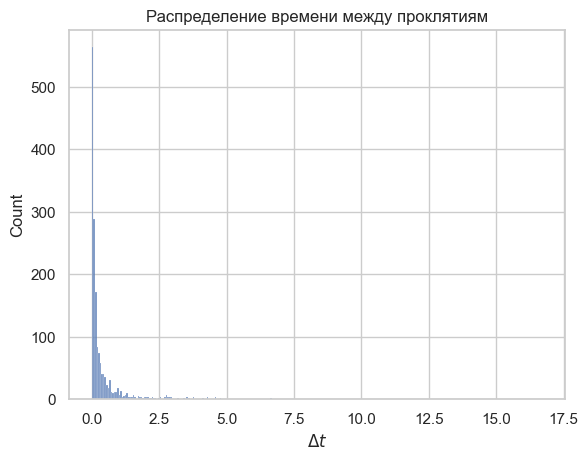

In [149]:
sns.histplot(data=df_word, x='time_diff').set(title='–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –≤—Ä–µ–º–µ–Ω–∏ –º–µ–∂–¥—É –ø—Ä–æ–∫–ª—è—Ç–∏—è–º', xlabel=r'$\Delta t$');

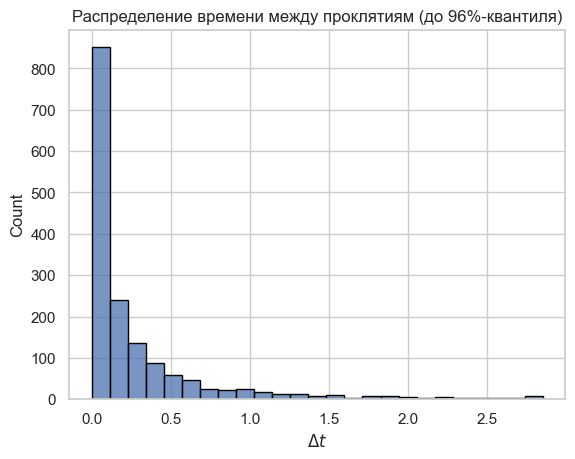

In [150]:
quantile = df_word['time_diff'].quantile(0.96)
filtered_time_diff = df_word['time_diff'][df_word['time_diff'] <= quantile]
sns.histplot(filtered_time_diff, bins=25, edgecolor='black')\
    .set(title='–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –≤—Ä–µ–º–µ–Ω–∏ –º–µ–∂–¥—É –ø—Ä–æ–∫–ª—è—Ç–∏—è–º (–¥–æ 96%-–∫–≤–∞–Ω—Ç–∏–ª—è)', xlabel=r'$\Delta t$');